In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


Correlación de varibles para los Medios

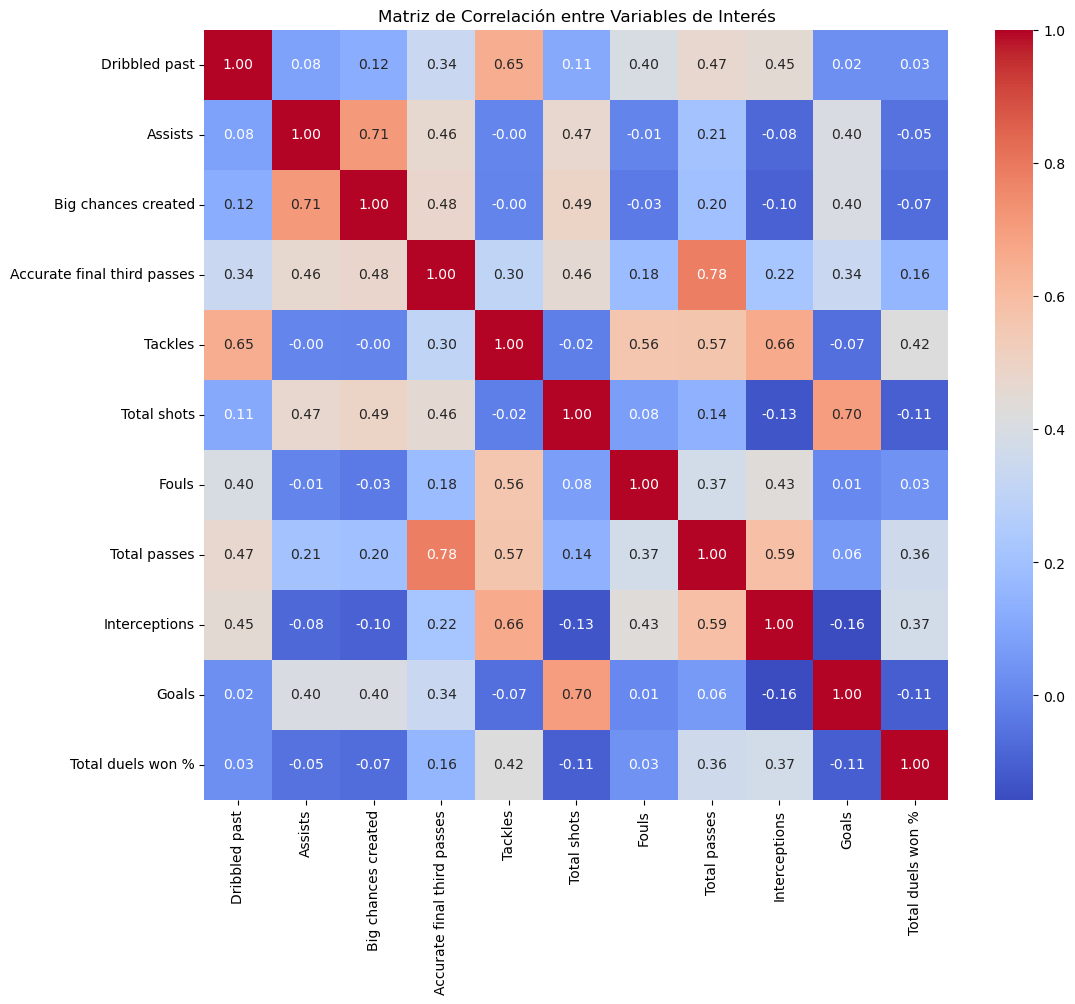

In [2]:


Data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Data Posición\df_medios_medias.csv")
pd.set_option('display.max_columns', None)

# Seleccionar las variables de interés
variables_interes = ['Dribbled past','Assists','Big chances created','Accurate final third passes','Tackles','Total shots','Fouls','Total passes','Interceptions','Goals','Total duels won %']

# Crear un nuevo DataFrame con solo las variables de interés
df_interes = Data[variables_interes]

# Calcular la matriz de correlación
correlacion = df_interes.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables de Interés')
plt.show()


ESTE ES EL FINAL 0:03

In [3]:
Data

,Name,Goals,Successful dribbles %,Total shots,Set piece conversion %,Tackles,Interceptions,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Joaquín Vergés,0.370000,43.590000,2.830000,0.510000,1.530000,0.600000,0.430000,0.170000,0.17000,27.170000,72.15000,6.370000,46.900000,37.040000,50.000000,1.030000,1.000000,30.000000,3.0,3.0,Ecuador Serie A,3.0
1,Mauro Díaz,0.290000,68.420000,1.290000,0.000000,0.860000,0.570000,0.480000,0.430000,0.14000,37.050000,83.80000,12.050000,68.000000,50.000000,62.260000,2.380000,0.950000,21.000000,3.0,3.0,Ecuador Serie A,3.0
2,Alexander Alvarado,0.320000,56.100000,1.900000,0.270000,0.900000,0.190000,0.190000,0.100000,0.16000,31.290000,85.46000,12.870000,79.630000,60.000000,52.130000,1.230000,1.100000,31.000000,1.0,3.0,Ecuador Serie A,3.0
3,Rómulo Otero,0.080000,62.500000,2.120000,0.160000,0.720000,0.160000,0.320000,0.200000,0.12000,21.440000,83.96000,6.960000,72.530000,53.330000,65.790000,3.360000,0.560000,25.000000,3.0,3.0,Ecuador Serie A,3.0
4,Sergio López,0.270000,47.620000,3.130000,0.950000,0.470000,0.270000,0.330000,0.130000,0.07000,33.530000,75.75000,9.930000,55.170000,37.500000,46.530000,1.200000,0.800000,15.000000,3.0,3.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,‪Ignacio Schor,0.000000,44.000000,0.370000,0.000000,0.530000,0.110000,0.630000,0.110000,0.05000,4.680000,73.03000,1.740000,100.000000,29.630000,30.650000,0.470000,1.210000,19.000000,1.0,3.0,Argentina LPF,2.0
6495,Francisco Di Franco,0.000000,38.460000,0.110000,0.000000,0.720000,0.110000,0.830000,0.000000,0.00000,9.890000,82.58000,2.170000,40.000000,31.580000,29.900000,0.280000,1.170000,18.000000,2.0,3.0,Argentina LPF,2.0
6496,Facundo Pérez,0.000000,50.000000,0.310000,0.000000,0.540000,0.380000,0.230000,0.000000,0.00000,7.920000,79.61000,0.920000,58.820000,33.330000,53.130000,0.460000,0.460000,13.000000,1.0,3.0,Argentina LPF,2.0
6497,Baltasar Rodriguez,0.000000,36.670000,0.550000,0.000000,1.360000,0.090000,1.270000,0.090000,0.00000,12.360000,75.00000,3.450000,28.570000,41.180000,35.350000,0.180000,1.090000,11.000000,1.0,3.0,Argentina LPF,2.0


In [4]:
Data = Data.fillna(0)

In [5]:
Data.columns

Index(['Name', 'Goals', 'Successful dribbles %', 'Total shots',
       'Set piece conversion %', 'Tackles', 'Interceptions', 'Dribbled past',
       'Big chances created', 'Assists', 'Total passes', 'Accurate passes %',
       'Accurate final third passes', 'Accurate long balls %',
       'Aerial duels won %', 'Total duels won %', 'Was fouled', 'Fouls',
       'Appearances', 'Age Range', 'Position', 'League', 'Level'],
      dtype='object')

In [6]:
Data

,Name,Goals,Successful dribbles %,Total shots,Set piece conversion %,Tackles,Interceptions,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Joaquín Vergés,0.370000,43.590000,2.830000,0.510000,1.530000,0.600000,0.430000,0.170000,0.17000,27.170000,72.15000,6.370000,46.900000,37.040000,50.000000,1.030000,1.000000,30.000000,3.0,3.0,Ecuador Serie A,3.0
1,Mauro Díaz,0.290000,68.420000,1.290000,0.000000,0.860000,0.570000,0.480000,0.430000,0.14000,37.050000,83.80000,12.050000,68.000000,50.000000,62.260000,2.380000,0.950000,21.000000,3.0,3.0,Ecuador Serie A,3.0
2,Alexander Alvarado,0.320000,56.100000,1.900000,0.270000,0.900000,0.190000,0.190000,0.100000,0.16000,31.290000,85.46000,12.870000,79.630000,60.000000,52.130000,1.230000,1.100000,31.000000,1.0,3.0,Ecuador Serie A,3.0
3,Rómulo Otero,0.080000,62.500000,2.120000,0.160000,0.720000,0.160000,0.320000,0.200000,0.12000,21.440000,83.96000,6.960000,72.530000,53.330000,65.790000,3.360000,0.560000,25.000000,3.0,3.0,Ecuador Serie A,3.0
4,Sergio López,0.270000,47.620000,3.130000,0.950000,0.470000,0.270000,0.330000,0.130000,0.07000,33.530000,75.75000,9.930000,55.170000,37.500000,46.530000,1.200000,0.800000,15.000000,3.0,3.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,‪Ignacio Schor,0.000000,44.000000,0.370000,0.000000,0.530000,0.110000,0.630000,0.110000,0.05000,4.680000,73.03000,1.740000,100.000000,29.630000,30.650000,0.470000,1.210000,19.000000,1.0,3.0,Argentina LPF,2.0
6495,Francisco Di Franco,0.000000,38.460000,0.110000,0.000000,0.720000,0.110000,0.830000,0.000000,0.00000,9.890000,82.58000,2.170000,40.000000,31.580000,29.900000,0.280000,1.170000,18.000000,2.0,3.0,Argentina LPF,2.0
6496,Facundo Pérez,0.000000,50.000000,0.310000,0.000000,0.540000,0.380000,0.230000,0.000000,0.00000,7.920000,79.61000,0.920000,58.820000,33.330000,53.130000,0.460000,0.460000,13.000000,1.0,3.0,Argentina LPF,2.0
6497,Baltasar Rodriguez,0.000000,36.670000,0.550000,0.000000,1.360000,0.090000,1.270000,0.090000,0.00000,12.360000,75.00000,3.450000,28.570000,41.180000,35.350000,0.180000,1.090000,11.000000,1.0,3.0,Argentina LPF,2.0


In [7]:
columnas_a_dividir = ['Successful dribbles %', 'Total shots',
       'Set piece conversion %','Total passes', 'Accurate passes %',
       'Accurate final third passes', 'Accurate long balls %',
       'Aerial duels won %', 'Total duels won %']

# Divide todos los datos de las columnas por 10
Data[columnas_a_dividir] = Data[columnas_a_dividir] / 10

In [8]:
Data

,Name,Goals,Successful dribbles %,Total shots,Set piece conversion %,Tackles,Interceptions,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Joaquín Vergés,0.370000,4.359000,0.283000,0.051000,1.530000,0.600000,0.430000,0.170000,0.17000,2.717000,7.215000,0.63700,4.690000,3.704000,5.000000,1.030000,1.000000,30.000000,3.0,3.0,Ecuador Serie A,3.0
1,Mauro Díaz,0.290000,6.842000,0.129000,0.000000,0.860000,0.570000,0.480000,0.430000,0.14000,3.705000,8.380000,1.20500,6.800000,5.000000,6.226000,2.380000,0.950000,21.000000,3.0,3.0,Ecuador Serie A,3.0
2,Alexander Alvarado,0.320000,5.610000,0.190000,0.027000,0.900000,0.190000,0.190000,0.100000,0.16000,3.129000,8.546000,1.28700,7.963000,6.000000,5.213000,1.230000,1.100000,31.000000,1.0,3.0,Ecuador Serie A,3.0
3,Rómulo Otero,0.080000,6.250000,0.212000,0.016000,0.720000,0.160000,0.320000,0.200000,0.12000,2.144000,8.396000,0.69600,7.253000,5.333000,6.579000,3.360000,0.560000,25.000000,3.0,3.0,Ecuador Serie A,3.0
4,Sergio López,0.270000,4.762000,0.313000,0.095000,0.470000,0.270000,0.330000,0.130000,0.07000,3.353000,7.575000,0.99300,5.517000,3.750000,4.653000,1.200000,0.800000,15.000000,3.0,3.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,‪Ignacio Schor,0.000000,4.400000,0.037000,0.000000,0.530000,0.110000,0.630000,0.110000,0.05000,0.468000,7.303000,0.17400,10.000000,2.963000,3.065000,0.470000,1.210000,19.000000,1.0,3.0,Argentina LPF,2.0
6495,Francisco Di Franco,0.000000,3.846000,0.011000,0.000000,0.720000,0.110000,0.830000,0.000000,0.00000,0.989000,8.258000,0.21700,4.000000,3.158000,2.990000,0.280000,1.170000,18.000000,2.0,3.0,Argentina LPF,2.0
6496,Facundo Pérez,0.000000,5.000000,0.031000,0.000000,0.540000,0.380000,0.230000,0.000000,0.00000,0.792000,7.961000,0.09200,5.882000,3.333000,5.313000,0.460000,0.460000,13.000000,1.0,3.0,Argentina LPF,2.0
6497,Baltasar Rodriguez,0.000000,3.667000,0.055000,0.000000,1.360000,0.090000,1.270000,0.090000,0.00000,1.236000,7.500000,0.34500,2.857000,4.118000,3.535000,0.180000,1.090000,11.000000,1.0,3.0,Argentina LPF,2.0


In [9]:
#Variables para el gráfico nº2

creadas_media = Data["Big chances created"].mean()
creadas_min = Data["Big chances created"].min()
creadas_max = Data["Big chances created"].max()
print(creadas_media)
print(creadas_min)
print(creadas_max)
print("-"*100)
Assists_media = Data["Assists"].mean()
Assists_min = Data["Assists"].min()
Assists_max = Data["Assists"].max()
print(Assists_media)
print(Assists_min)
print(Assists_max)
print("-"*100)
Goals_media = Data["Goals"].mean()
Goals_min = Data["Goals"].min()
Goals_max = Data["Goals"].max()
print(Goals_media)
print(Goals_min)
print(Goals_max)
print("-"*100)
Tackles_media = Data["Tackles"].mean()
Tackles_min = Data["Tackles"].min()
Tackles_max = Data["Tackles"].max()
print(Tackles_media)
print(Tackles_min)
print(Tackles_max)
print("-"*100)
Fouls_media = Data["Fouls"].mean()
Fouls_min = Data["Fouls"].min()
Fouls_max = Data["Fouls"].max()
print(Fouls_media)
print(Fouls_min)
print(Fouls_max)
print("-"*100)
Interceptions_media = Data["Interceptions"].mean()
Interceptions_min = Data["Interceptions"].min()
Interceptions_max = Data["Interceptions"].max()
print(Interceptions_media)
print(Interceptions_min)
print(Interceptions_max)
print("-"*100)

0.10185287780855647
0.0
0.97
----------------------------------------------------------------------------------------------------
0.07094028931979071
0.0
0.62
----------------------------------------------------------------------------------------------------
0.07878116343490306
0.0
0.75
----------------------------------------------------------------------------------------------------
1.2119052016004925
0.0
4.73
----------------------------------------------------------------------------------------------------
0.8987149892274545
0.0
2.94
----------------------------------------------------------------------------------------------------
0.6334318251769775
0.0
3.0
----------------------------------------------------------------------------------------------------


In [10]:
Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)
# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=5)  # Buscamos 4 vecinos porque uno de ellos será el jugador mismo
# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Total passes','Successful dribbles %', 'Accurate passes %', 'Accurate long balls %','Aerial duels won %','Total duels won %','Set piece conversion %','Total shots','Tackles','Interceptions','Fouls','Dribbled past','Assists','Big chances created','Goals','Was fouled','Accurate final third passes']
#caracteristicas_grafico = ['Goals', 'Accurate final third passes','Interceptions', 'Big chances created','Assists','Was fouled', 'Fouls']

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

# ... (código anterior)
def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    jugador = Data[Data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])  # Normalización para el modelo
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][0:]]  # Excluimos el primer resultado porque será el jugador mismo
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
        
        # Agregar 'Media' a la lista de jugadores similares antes de mostrar el DataFrame
        jugadores_similares = pd.concat([jugadores_similares, Data[Data['Name'] == 'Media']])
        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares[caracteristicas_grafico].values):  # Usamos los valores originales aquí
            fig.add_trace(go.Scatterpolar(
                r=row,
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name']
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 10]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()

        jugadores_similares = Data.iloc[indices[0]] 
       # Configura una cuadrícula de subplots con 3 filas y 2 columnas
        fig, axs = plt.subplots(3, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario
        # Gráfico de dispersión para Big chances created
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances created'], color=colores[i % len(colores)], marker='o')
        for line in [creadas_max, creadas_media, creadas_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Big chances created de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Big chances created')
        # Gráfico de dispersión para Assists
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Assists'], color=colores[i % len(colores)], marker='o')
        for line in [Assists_max, Assists_media, Assists_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Assists de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Assists')
        # Gráfico de dispersión para Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_max, Goals_media, Goals_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de Goals de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Goals')
        # Gráfico de dispersión para Fouls
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Fouls'], color=colores[i % len(colores)], marker='o')
        for line in [Fouls_max, Fouls_media, Fouls_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de Fouls de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Fouls')
        # Gráfico de dispersión para Tackles
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Tackles'], color=colores[i % len(colores)], marker='o')
        for line in [Tackles_max, Tackles_media, Tackles_min]:
            axs[2, 0].axhline(y=line, color='r', linestyle='--')
        axs[2, 0].set_title('Comparativa de Tackles de los jugadores similares')
        axs[2, 0].set_xticks(range(len(jugadores_similares)))
        axs[2, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 0].set_xlabel('Jugadores')
        axs[2, 0].set_ylabel('Tackles')
        # Gráfico de dispersión para Interceptions
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Interceptions'], color=colores[i % len(colores)], marker='o')
        for line in [Interceptions_max, Interceptions_media, Interceptions_min]:
            axs[2, 1].axhline(y=line, color='r', linestyle='--')
        axs[2, 1].set_title('Comparativa de Interceptions de los jugadores similares')
        axs[2, 1].set_xticks(range(len(jugadores_similares)))
        axs[2, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 1].set_xlabel('Jugadores')
        axs[2, 1].set_ylabel('Interceptions')
        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()
        return

,Name,Goals,Successful dribbles %,Total shots,Set piece conversion %,Tackles,Interceptions,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
6138,Toni Kroos,0.070000,4.737000,0.103000,0.000000,1.700000,0.800000,1.530000,0.230000,0.13000,7.770000,9.459000,2.17000,8.571000,6.364000,5.099000,1.200000,0.930000,30.000000,3.0,3.0,España La Liga 1,1.0
6143,Frenkie de Jong,0.060000,6.364000,0.055000,0.000000,1.390000,1.060000,0.730000,0.240000,0.12000,6.839000,9.145000,1.82400,8.197000,6.809000,5.632000,1.030000,1.000000,33.000000,2.0,3.0,España La Liga 1,1.0
6142,Dani Parejo,0.080000,7.632000,0.081000,0.000000,1.920000,0.780000,1.220000,0.190000,0.11000,6.514000,9.062000,1.71600,7.426000,4.474000,5.801000,2.030000,0.810000,37.000000,3.0,3.0,España La Liga 1,1.0
1781,Frank Anguissa,0.080000,5.000000,0.139000,0.000000,1.470000,1.360000,1.330000,0.080000,0.14000,6.178000,8.885000,1.61700,6.742000,6.351000,4.726000,1.330000,1.220000,36.000000,2.0,3.0,Italia Serie A,1.0
682,Marco Verratti,0.000000,6.744000,0.028000,0.000000,2.620000,0.930000,1.760000,0.170000,0.00000,8.748000,9.287000,2.02400,6.780000,4.583000,5.382000,1.830000,1.240000,29.000000,3.0,3.0,Francia Liga 1,2.0
6498,Media,0.078781,5.285832,0.089788,0.006275,1.211905,0.633432,0.654134,0.101853,0.07094,2.630254,7.889799,0.62706,5.282306,4.241588,4.842408,0.899638,0.898715,23.660665,0.0,0.0,0,0.0


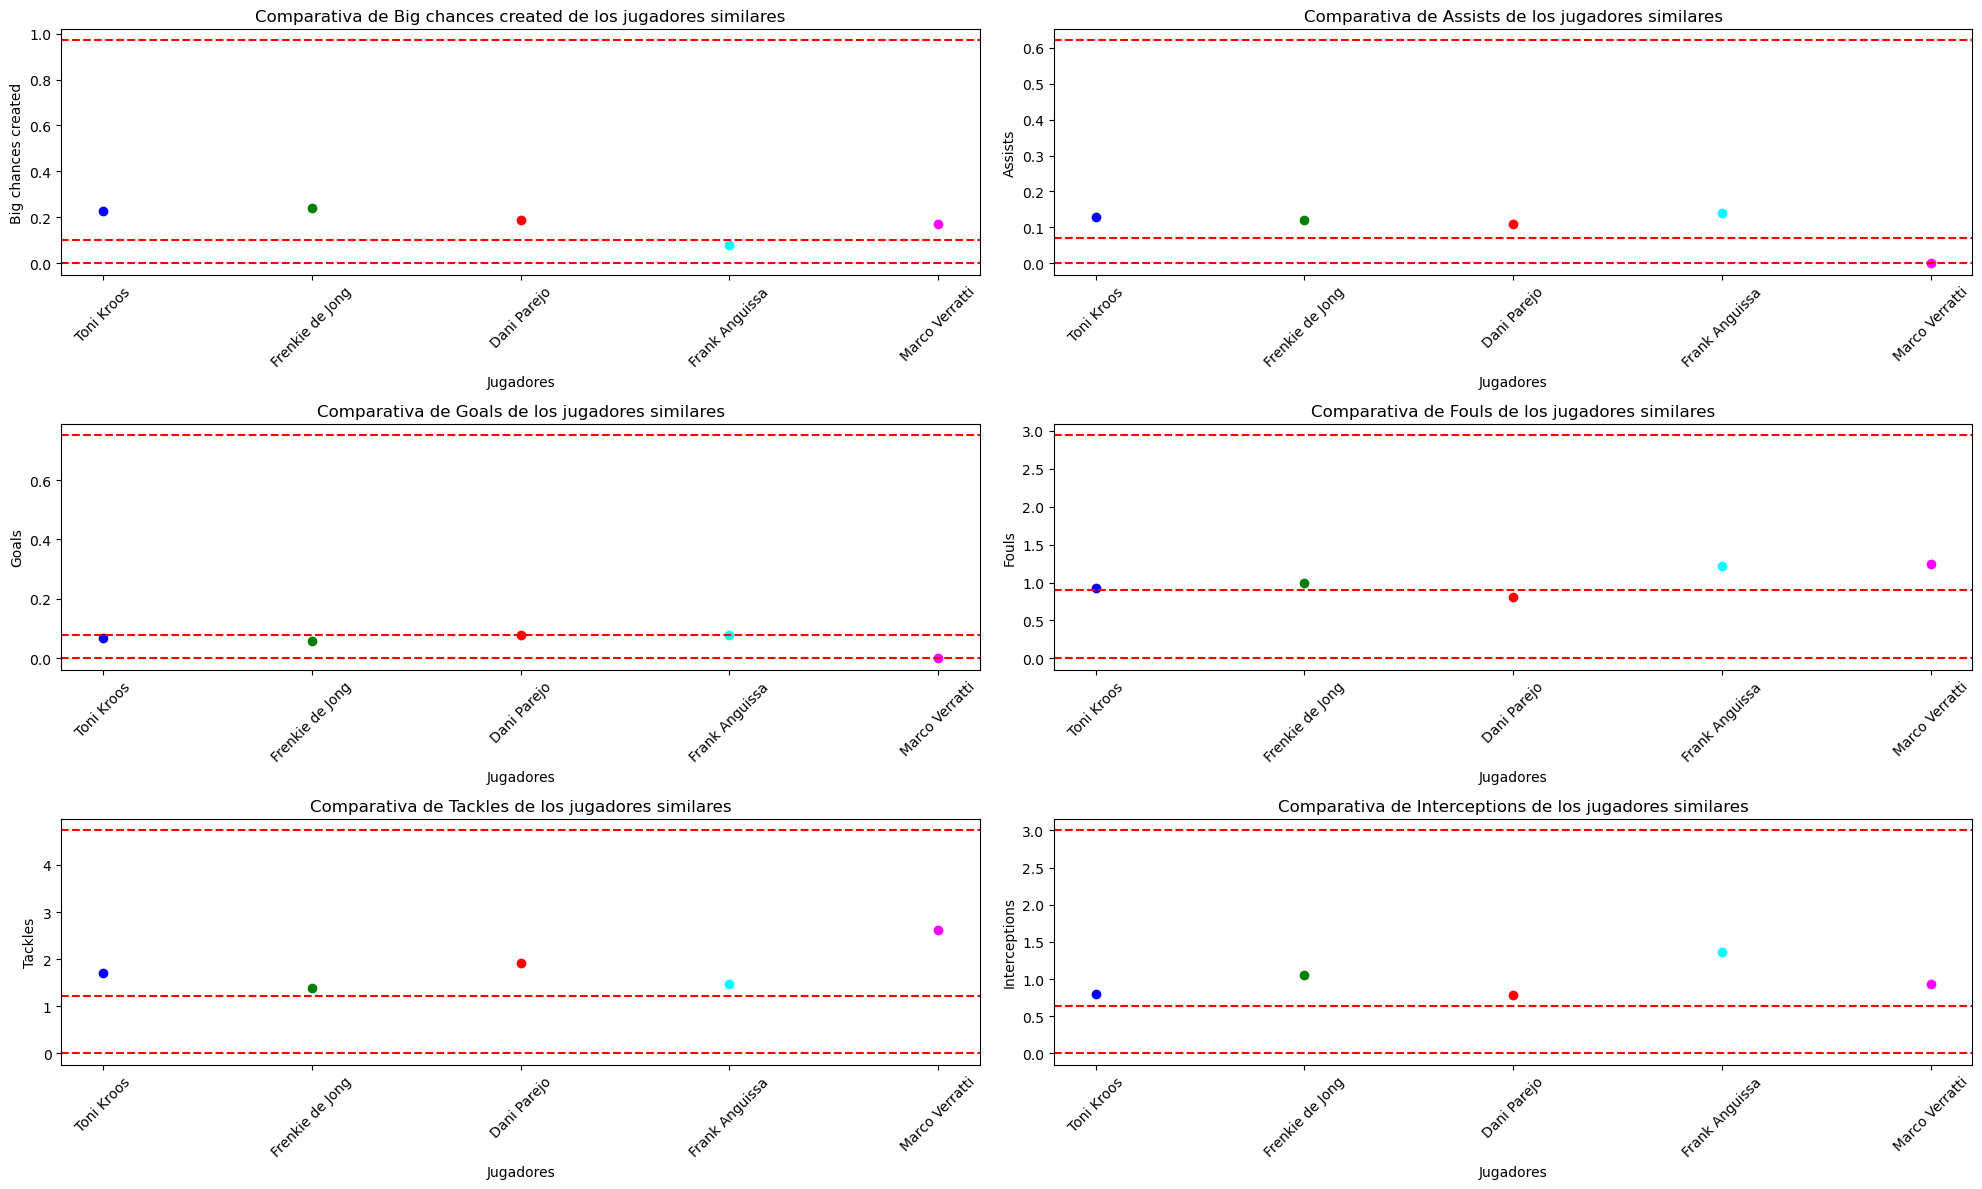

In [13]:
buscar_jugadores_similares('Toni Kroos', caracteristicas_grafico)